Which restaurants have the best price-to-rating ratio?

In [2]:
import os

os.chdir('C:/Users/esram/OneDrive/Desktop/esrabecode/delivery-market-analysis')

os.getcwd()

'C:\\Users\\esram\\OneDrive\\Desktop\\esrabecode\\delivery-market-analysis'

Subquery Version

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
conn = sqlite3.connect('data/takeaway.db')

query = """ 
    SELECT r.primarySlug,
           r.name,
           r.city,
           r.ratings,
           r.ratingsNumber,
           r.deliveryFee,
           r.durationRangeMin,
           r.durationRangeMax,
           r.ratings/ m_avg.avg_price AS price_to_rating_ratio
    FROM restaurants r
    JOIN (
        SELECT primarySlug,
               AVG(price) AS avg_price
        FROM menuItems
        GROUP BY primarySlug) m_avg
    ON r.primarySlug = m_avg.primarySlug
    WHERE m_avg.avg_price > 0
    ORDER BY price_to_rating_ratio DESC
    LIMIT 10;

"""
top_10 = pd.read_sql_query(query, conn)
top_10


,primarySlug,name,city,ratings,ratingsNumber,deliveryFee,durationRangeMin,durationRangeMax,price_to_rating_ratio
0,le-corner-1,Le Corner,Jette,5.0,3,0.00,20,45,2.115656
1,el-bocadillos,El Bocadillos,Bruxelles,4.2,307,5.59,55,65,2.100000
2,boulangerie-salam,Boulangerie Salam,Molenbeek-Saint-Jean,4.1,21,5.59,45,55,2.010262
3,doce-tentacao-patisserie,Pâtisserie Doce Tentação,Saint-Gilles,5.0,6,5.59,60,70,1.904762
4,bazi-boulangerie,Bazi Boulangerie,Anderlecht,4.3,10,5.59,45,55,1.841310
5,amigos,Frituur Amigos,Wilrijk,4.3,1172,0.00,25,50,1.782927
6,frituur-t-krokantje,Frituur 't Krokantje,Sint-Gillis-Waas,4.9,19,2.00,15,40,1.764000
7,quetacos,QueTacos,Maasmechelen,5.0,157,2.50,20,45,1.750000
8,frituur-opt-hoekske,Frituur op't Hoekske,Vilvoorde,5.0,14,3.00,20,45,1.747641
9,frituur-4-you,Frituur 4 You,Vilvorde,4.7,220,0.00,20,45,1.746906


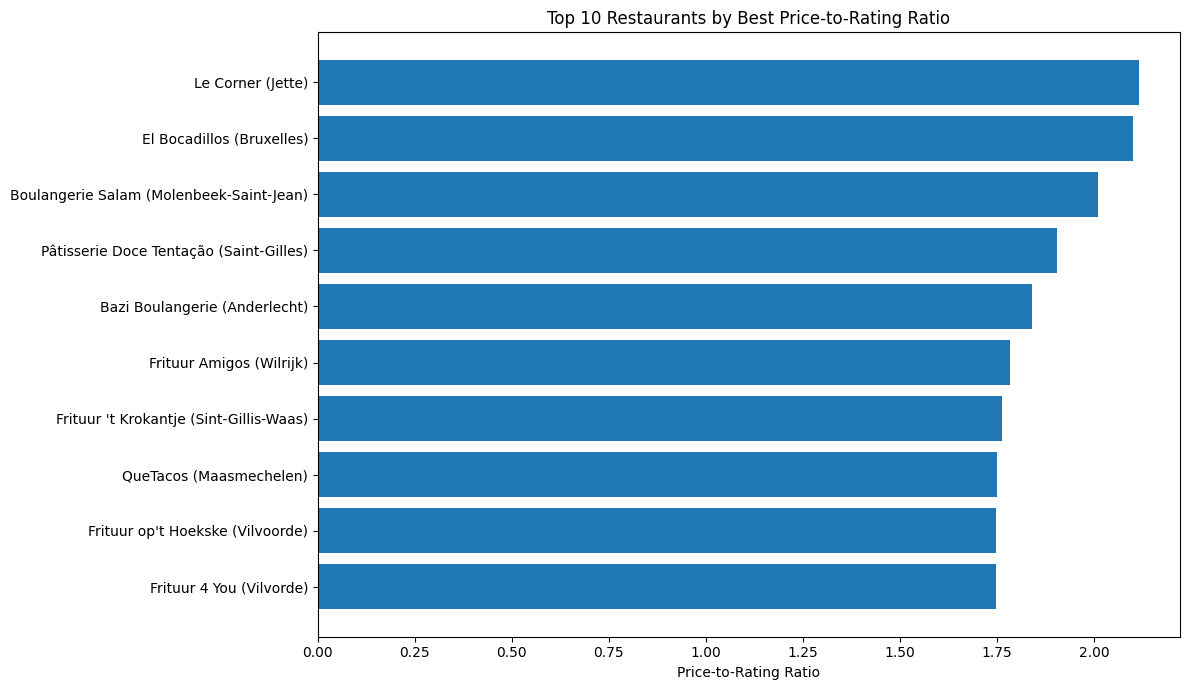

In [5]:
import matplotlib.pyplot as plt

# Restoran adı + şehir etiketi
top_10['label'] = top_10['name'] + " (" + top_10['city'] + ")"

plt.figure(figsize=(12, 7))

plt.barh(
    top_10['label'],
    top_10['price_to_rating_ratio']
)

plt.xlabel('Price-to-Rating Ratio')
plt.title('Top 10 Restaurants by Best Price-to-Rating Ratio')
plt.gca().invert_yaxis()  # En iyi değer üstte
plt.tight_layout()
plt.show()


CTE Version (WITH … AS)

In [6]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('data/takeaway.db')

query_cte_fixed = """

WITH avg_price_cte AS (
    SELECT primarySlug,
           AVG(price) AS avg_price
    FROM menuItems
    GROUP BY primarySlug
)
SELECT r.primarySlug,
       r.name,
       r.city,
       r.ratings,
       r.ratingsNumber,
       r.deliveryFee,
       r.durationRangeMin,
       r.durationRangeMax,
       r.ratings / avg_price_cte.avg_price AS price_to_rating
FROM restaurants r
JOIN avg_price_cte
  ON r.primarySlug = avg_price_cte.primarySlug
WHERE avg_price_cte.avg_price > 0
ORDER BY price_to_rating DESC
LIMIT 10;


"""
top_10 = pd.read_sql_query(query, conn)
top_10

,primarySlug,name,city,ratings,ratingsNumber,deliveryFee,durationRangeMin,durationRangeMax,price_to_rating_ratio
0,le-corner-1,Le Corner,Jette,5.0,3,0.00,20,45,2.115656
1,el-bocadillos,El Bocadillos,Bruxelles,4.2,307,5.59,55,65,2.100000
2,boulangerie-salam,Boulangerie Salam,Molenbeek-Saint-Jean,4.1,21,5.59,45,55,2.010262
3,doce-tentacao-patisserie,Pâtisserie Doce Tentação,Saint-Gilles,5.0,6,5.59,60,70,1.904762
4,bazi-boulangerie,Bazi Boulangerie,Anderlecht,4.3,10,5.59,45,55,1.841310
5,amigos,Frituur Amigos,Wilrijk,4.3,1172,0.00,25,50,1.782927
6,frituur-t-krokantje,Frituur 't Krokantje,Sint-Gillis-Waas,4.9,19,2.00,15,40,1.764000
7,quetacos,QueTacos,Maasmechelen,5.0,157,2.50,20,45,1.750000
8,frituur-opt-hoekske,Frituur op't Hoekske,Vilvoorde,5.0,14,3.00,20,45,1.747641
9,frituur-4-you,Frituur 4 You,Vilvorde,4.7,220,0.00,20,45,1.746906
